In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Text preprocessing function
str_punc = string.punctuation.replace(',', '').replace("'",'')

def clean(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text    

In [ ]:
# Read dataset & Preprocess text
df_train = pd.read_csv('/content/drive/MyDrive/train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('/content/drive/MyDrive/val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/test.txt', names=['Text', 'Emotion'], sep=';')

X_train = df_train['Text'].apply(clean)
y_train = df_train['Emotion']

X_test = df_test['Text'].apply(clean)
y_test = df_test['Emotion']

X_val = df_val['Text'].apply(clean)
y_val = df_val['Emotion']


In [ ]:
df_train

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
X_train 


0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: Text, Length: 16000, dtype: object

In [ ]:
y_train


array([[4],
       [4],
       [0],
       ...,
       [2],
       [0],
       [4]])

In [ ]:
#y_train.value_counts()[y_train.unique()[0]]
#y_train.unique()
print(y_train.value_counts())
print(y_test.value_counts())
print(y_val.value_counts())

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64


In [ ]:
train_labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
height_train = [0, 0, 0, 0, 0, 0]

test_labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
height_test = [0, 0, 0, 0, 0, 0]

val_labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
height_val = [0, 0, 0, 0, 0, 0]

for i in y_train:
  if i == train_labels[0]:
    height_train[0] += 1
  elif i == train_labels[1]:
    height_train[1] += 1
  elif i == train_labels[2]:
    height_train[2] += 1
  elif i == train_labels[3]:
    height_train[3] += 1
  elif i == train_labels[4]:
    height_train[4] += 1
  elif i == train_labels[5]:
    height_train[5] += 1

for i in y_test:
  if i == test_labels[0]:
    height_test[0] += 1
  elif i == test_labels[1]:
    height_test[1] += 1
  elif i == test_labels[2]:
    height_test[2] += 1
  elif i == test_labels[3]:
    height_test[3] += 1
  elif i == test_labels[4]:
    height_test[4] += 1
  elif i == test_labels[5]:
    height_test[5] += 1

for i in y_val:
  if i == val_labels[0]:
    height_val[0] += 1
  elif i == val_labels[1]:
    height_val[1] += 1
  elif i == val_labels[2]:
    height_val[2] += 1
  elif i == val_labels[3]:
    height_val[3] += 1
  elif i == val_labels[4]:
    height_val[4] += 1
  elif i == val_labels[5]:
    height_val[5] += 1

print(height_train)
print(height_test)
print(height_val)

[4666, 2159, 1304, 572, 1937, 5362]
[581, 275, 159, 66, 224, 695]
[550, 275, 178, 81, 212, 704]


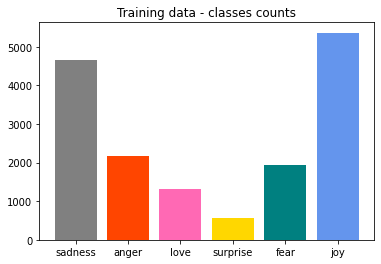

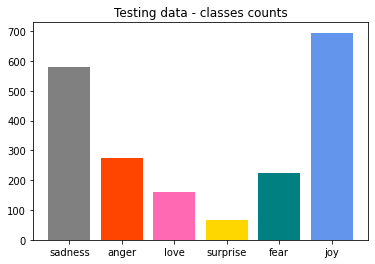

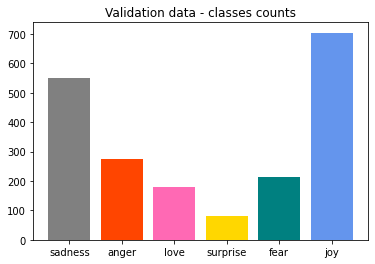

In [ ]:
# Visualize classes counts
colors = np.array(["gray", 'orangered', 'hotpink', 'gold', 'teal', 'cornflowerblue'])

plt.bar(y_train.unique(), height_train, color=colors)
plt.title("Training data - classes counts")
plt.show()

plt.bar(test_labels, height_test, color=colors)
plt.title("Testing data - classes counts")
plt.show()

plt.bar(val_labels, height_val, color=colors)
plt.title("Validation data - classes counts")
plt.show()

In [ ]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)


In [ ]:
#y_val = y_val.reshape(-1,1)
y_train

array([[4],
       [4],
       [0],
       ...,
       [2],
       [0],
       [4]])

In [ ]:
# Tokenize words
max_len = 256
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

X_train = pad_sequences(sequences_train, maxlen=max_len, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=max_len, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=max_len, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 16185


In [ ]:
#Read GloVE embeddings
path_to_glove_file = '/content/drive/MyDrive/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0
embeddings_index = {}

# Read word vectors
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))


# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 15069 words (1115 misses)


In [ ]:
print(X_train)

[[   0    0    0 ...  138    2  642]
 [   0    0    0 ...    3   21 1344]
 [   0    0    0 ...    2  462  414]
 ...
 [   0    0    0 ...    3  104 1429]
 [   0    0    0 ...  333    8   42]
 [   0    0    0 ...   25 3855   12]]


In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GlobalAveragePooling1D, Conv1D, Flatten, SimpleRNN, TimeDistributed
from keras.regularizers import l1, l2

# Build neural network architecture

adam = Adam(learning_rate=0.005)

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocabSize, embedding_dim, weights=[embedding_matrix], input_length = 256, trainable=True),
                                    Bidirectional(LSTM(32, return_sequences=True)), 
                                    Bidirectional(LSTM(32, return_sequences=False)), 
                                    tf.keras.layers.Dropout(0.3),
                                    Dense(256, activation='relu'),
                                    Dropout(0.5),
                                    Dense(128, activation='relu'),
                                    Dropout(0.3),
                                    Dense(32, activation='relu'),
                                    Dropout(0.2),
                                    #tf.keras.layers.Dense(6, kernel_regularizer=l2(0.001),
                                                          #bias_regularizer=l2(0.001), activation='relu'),
                                    #tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(6, activation='softmax')])
model.summary()


model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 200)          3237000   
                                                                 
 bidirectional (Bidirectiona  (None, 256, 64)          59648     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [ ]:
#Callback
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# Fit model

history = model.fit(X_train, y_train, batch_size=256,epochs=20, validation_data=(X_val, y_val),callbacks=callback)

Epoch 1/20
63/63 [==============================] - 12s 77ms/step - loss: 1.3643 - accuracy: 0.4793 - val_loss: 0.9212 - val_accuracy: 0.6885
Epoch 2/20
63/63 [==============================] - 3s 54ms/step - loss: 0.6422 - accuracy: 0.7372 - val_loss: 0.4502 - val_accuracy: 0.8235
Epoch 3/20
63/63 [==============================] - 3s 55ms/step - loss: 0.3659 - accuracy: 0.8499 - val_loss: 0.3133 - val_accuracy: 0.8745
Epoch 4/20
63/63 [==============================] - 3s 55ms/step - loss: 0.2073 - accuracy: 0.9288 - val_loss: 0.2643 - val_accuracy: 0.9250
Epoch 5/20
63/63 [==============================] - 3s 54ms/step - loss: 0.1310 - accuracy: 0.9587 - val_loss: 0.3039 - val_accuracy: 0.9165
Epoch 6/20
63/63 [==============================] - 3s 54ms/step - loss: 0.1002 - accuracy: 0.9684 - val_loss: 0.3078 - val_accuracy: 0.9285
Epoch 7/20
63/63 [==============================] - 3s 54ms/step - loss: 0.0764 - accuracy: 0.9760 - val_loss: 0.3404 - val_accuracy: 0.9170


In [ ]:
model.evaluate(X_val, y_val, verbose=1)

63/63 [==============================] - 1s 18ms/step - loss: 0.3404 - accuracy: 0.9170


[0.34040990471839905, 0.9169999957084656]

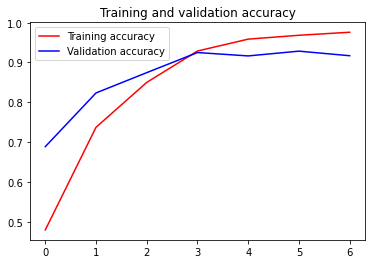

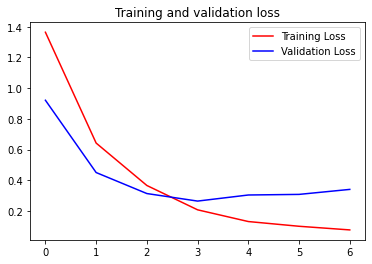

In [ ]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Classify custom sample
sentences = [
            "you won and i am proud of you",
             "i lost the game and i am disappointed", 
             "it made me shocked and gasped"       
            ]
labels = train_labels
labels.sort       
          
for sentence in sentences:
    print(sentence)
    sentence = clean(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_len, truncating='pre')
    #result = le.inverse_transform(np.argmax(model.predict(sentence), axis=0))[0]
    #test = model.predict(sentence)
    proba =  np.max(model.predict(sentence))
    index = np.argmax(model.predict(sentence))
    result = labels[index]
    print(f"{result} : {proba*100} %\n")

you won and i am proud of you
joy : 99.28777813911438 %

i lost the game and i am disappointed
sadness : 99.99065399169922 %

it made me shocked and gasped
surprise : 87.14656233787537 %



In [ ]:
import pickle
from google.colab import files

with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)
    
with open('labelEncoder.pickle', 'wb') as f:
    pickle.dump(le, f)
    
    
model.save('Emotion Recognition.h5')
files.download('Emotion Recognition.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>